<a href="https://colab.research.google.com/github/xyzall1/IPSD-Assigment/blob/main/GeneticAlgorithm1Function2Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A genetic algorithm for optimizing function with two variables

Minimize
$$f(x,y)=(x+2y-7)^2+(2x+y-5)^2$$

Subject to
$$-10 \le x \le 10$$
$$-10 \le y \le 10$$

Global minimum
$$
f(1,3)=0
$$

Plot

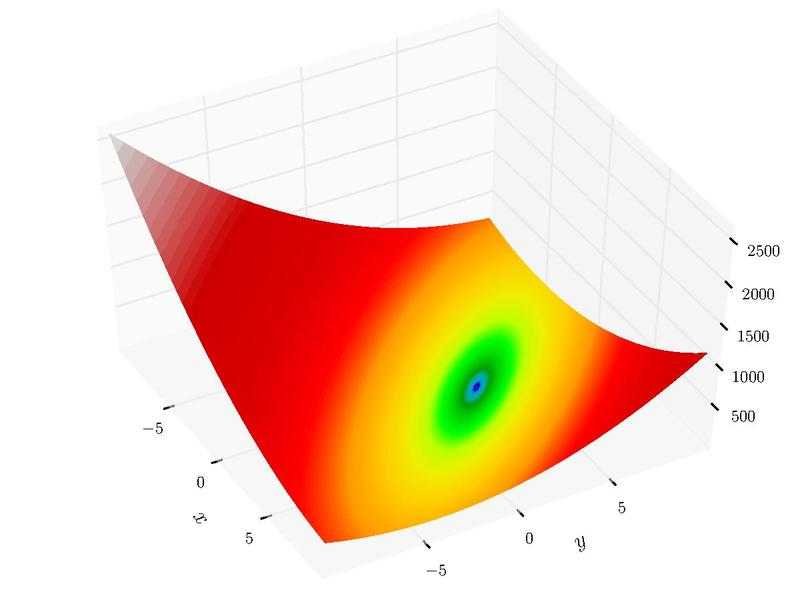

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# minimum value and maximum value of the variables in the function
min_value = -10
max_value = 10

# number of variables, length of chromosome
m = 2

# number of chromosomes in population
n = 100

p_c = 1
p_m = 1

# maximum generation
N = 100

In [ ]:
def createPopulation():
    pop = np.random.rand(n, m)*(max_value - min_value) + min_value
    pop = pd.DataFrame(pop)
    pop.columns = ['x', 'y']

    return pop

In [ ]:
def fitness(pop):
    fitness = (pop['x'] + 2*pop['y'] - 7)**2 + (2*pop['x'] + pop['y'] - 5)**2
    pop['fitness'] = fitness

    return pop

In [ ]:
def randomSelection():
    position = np.random.permutation(n)

    return position[0], position[1]

In [ ]:
def crossover(pop):
    popc = pop.copy()
    for i in range(n):
        a, b = randomSelection()
        x = (pop.loc[a] + pop.loc[b])/2
        popc.loc[i] = x

    return popc

In [ ]:
def mutation(popc, g):
    popm = popc.copy()

    for i in range(n):
        for j in popm.columns:
            popm.loc[i][j] += (np.random.rand()-0.5)/(g+1)

    return popm

In [ ]:
def combinePopulation(pop, popc, popm):
    popAll = pd.concat([pop, popc])
    popAll = pd.concat([popAll, popm])

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [ ]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])

    popAll.index = range(len(popAll))

    return popAll

In [ ]:
def elimination(popAll):
    pop = popAll.head(n)

    return pop

In [ ]:
pop = createPopulation()
pop = fitness(pop)
print('Population 0 (Initial)')
print(pop)

for i in range(1, N+1):
    popc = crossover(pop)
    popc = fitness(popc)

    popm = mutation(popc, i)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popc, popm)

    popAll = sort(popAll)

    pop = elimination(popAll)

    print()
    print('Population ' + str(i))
    print(pop)

Population 0 (Initial)
           x         y      fitness
0  -1.943757 -3.067096   370.257204
1  -6.925520 -3.612473   951.951633
2  -3.725981  5.474062    48.740446
3  -0.757428 -5.755818   521.866215
4  -6.094209 -7.135392  1340.490580
..       ...       ...          ...
95  9.932062 -4.406592   143.947571
96 -7.198664 -5.607445  1271.087347
97 -6.431463  6.863299   121.078890
98  5.595167 -4.256404   102.099690
99  6.899513  1.720842   121.831244

[100 rows x 3 columns]

Population 1
           x         y    fitness
0   0.516337  3.421743   0.427134
1   1.554011  2.427200   0.636440
2   0.698967  3.571843   0.710980
3   1.499796  2.303997   0.888206
4   1.336336  3.191601   1.264704
..       ...       ...        ...
95  4.724448 -3.034079  71.619194
96  7.115936 -0.898972  72.266361
97  5.206353 -3.245253  73.325034
98 -4.382223  5.230767  73.671348
99  7.388669 -1.832850  73.853824

[100 rows x 3 columns]

Population 2
           x         y    fitness
0   1.084479  2.799618   0.